In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Question 2: Implement thuật toán PCA bằng numpy

In [2]:
class pca:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit(self, X):
        # Normalize the data
        X = X - np.mean(X, axis= 0)
        
        # Covariance Matrix
        cov_mat = np.cov(X.T)
        
        # Eigenvalue and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
        
        # Descending-ordered index of eigenvalues
        idxs = np.argsort(eigenvalues)[::-1] 
        
        # Sort the eigenvalues
        eigenvalues = eigenvalues[idxs]
        
        # Sort the eigenvectors 
        eigenvectors = eigenvectors.T
        eigenvectors = eigenvectors[idxs]
        
        # Select a subset of eigenvectors
        self.n_components = eigenvectors[:self.n_components]
        
        # Explained Variance
        total_var = np.sum(eigenvalues)
        exp_var_percent = [(i / total_var) * 100 for i in eigenvalues]
        self.exp_var = np.cumsum(exp_var_percent)
        
    def transform(self, X):
        X = X - np.mean(X, axis= 0)
        return np.dot(X, self.n_components.T)
        
    def explained_variance(self):
        return self.exp_var

# Question3: Dùng thuật toán ở bài 2, giảm dữ liệu iris về 2 chiều

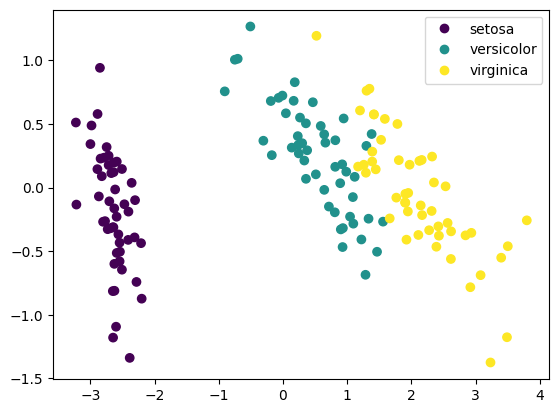

In [3]:
# Load the data
iris = datasets.load_iris()
    
# Split iris into data and target
x = iris.data
y = iris.target
target_names = iris.target_names
    
# PCA
PCA = pca(2)
PCA.fit(x)
X_projected = PCA.transform(x)
    

# Visualize the projections with labels
fig, ax = plt.subplots()
scatter = ax.scatter(x= X_projected[:, 0], y= X_projected[:, 1], c= y)
ax.legend(handles= scatter.legend_elements()[0], labels= list(target_names))
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

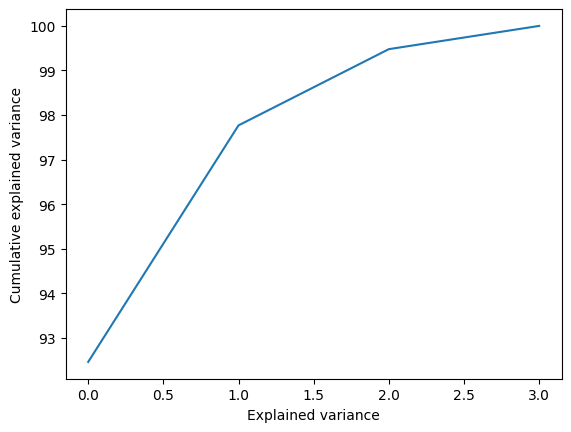

In [4]:
# Visualize explained variance
fig1, ax1 = plt.subplots()
ax1.plot(PCA.explained_variance(), label= "Explained Variance")
plt.xlabel('Explained variance')
plt.ylabel('Cumulative explained variance')

# Question 4: Thử dùng bài 3 với thuật toán PCA trong sklearn, so sánh kết quả

In [5]:
from sklearn import datasets
from sklearn.decomposition import PCA

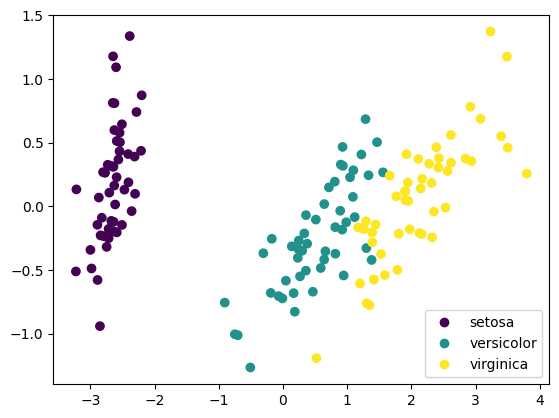

In [6]:
pca = PCA(2)  
X_projected = pca.fit_transform(iris.data)

scatter = plt.scatter(X_projected[:,0], X_projected[:,1], c= y)
plt.legend(handles= scatter.legend_elements()[0], labels= list(target_names))
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

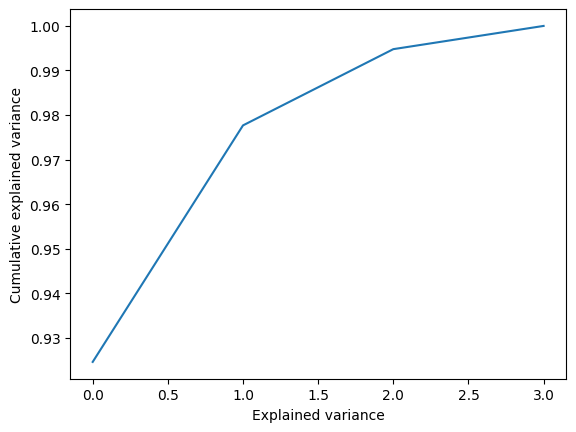

In [7]:
pca = PCA() 
X_projected = pca.fit(iris.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Explained variance')
plt.ylabel('Cumulative explained variance')